In [ ]:
# Load packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 

# import packages 
import re
import shutil
import os

# 1 Import transcript length

In [1]:
# Import all transcript with a read coverage of at least 10 reads
transcriptome_10reads = pd.read_csv('number_of_genes_with_total_of_10_reads.csv')

# Import the transcriptome to have the length of ALL transcripts 
annotation_length = pd.read_csv('../A_annotation/carcar_annotation_v5_transcript_lengths.tsv', sep='\t')

# Import the transcriptome to have the length of ALL transcripts 
stringtie_length = pd.read_csv('../B_transcriptome/transcriptome_transcript_lengths.tsv', sep='\t')

# create one df out of annotation_length and stringtie_length (append the rows from one to the other)
length = pd.concat([annotation_length, stringtie_length], ignore_index=True)

# Filter to only keep the transcriptome_length rows that have a read coverage of at least 10 reads
transcriptome_length = length.loc[length['transcript_id'].isin(transcriptome_10reads['x'])]

NameError: name 'pd' is not defined

In [ ]:
# Specify the directory containing the .csv files
directory = '../9_1_dea_lncrna/deg_data'

# Create an empty list to hold the dataframes
dataframes = []

# Iterate over all files in the specified directory
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    # Check if the file is a .csv file and is named up.csv or down.csn
    if filename.endswith('up.csv') or filename.endswith('down.csv'):
        df = pd.read_csv(filepath)
        dataframes.append(df)

# Merge all dataframes into a single dataframe
deg = pd.concat(dataframes, ignore_index=True)


In [ ]:
# extract the length information for the lncRNAs from the transcript file
deg_length = transcriptome_length[transcriptome_length['transcript_id'].str.lower().isin(deg['transcript_id'])]


In [ ]:
# calculate max/min/ average length of gene length
transcriptome_max = transcriptome_length['length'].max()
transcriptome_min = transcriptome_length['length'].min()
transcriptome_mean = transcriptome_length['length'].mean()

# calculate max length of gene length
deg_max = deg_length['length'].max()
deg_min = deg_length['length'].min()
deg_median = deg_length['length'].median()



# 2 Histplot transcript and detranscript length 

/tmp/ipykernel_1102/2174066208.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transcriptome_length['length_kb'] = np.array(transcriptome_length['length']) / 1000
/tmp/ipykernel_1102/2174066208.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deg_length['length_kb'] = np.array(deg_length['length']) / 1000


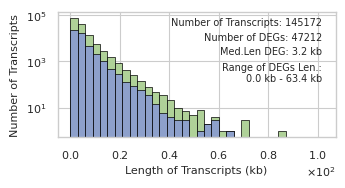

In [ ]:
# PLOT: Length Distribution of Genes 
sns.set_theme(style = 'whitegrid', palette='colorblind', context='paper', rc={'axes.labelsize':8, 'xtick.labelsize':8, 'ytick.labelsize':8, 'legend.fontsize':8, 'legend.title_fontsize':8, "axes.formatter.use_mathtext": True})
plt.figure(figsize=(((9)/2.54), (5/2.54)))


# Convert lengths to kilobases
transcriptome_length['length_kb'] = np.array(transcriptome_length['length']) / 1000
deg_length['length_kb'] = np.array(deg_length['length']) / 1000

# on the x axis: Length of genes (in kb)
plt.xlabel('Length of Transcripts (kb)')
# on the y axis: Number of genes
plt.ylabel('Number of Transcripts')

# plot the histogram
plt.hist(transcriptome_length['length_kb'], bins=range(0, int(max(transcriptome_length['length_kb']) + 20), 3),
          color='#AFD198', edgecolor='black', linewidth=0.5)
plt.hist(deg_length['length_kb'], bins=range(int(min(deg_length['length_kb'])), int(max(deg_length['length_kb']) + 20), 3), 
         color='#8DA0CB', edgecolor='black', linewidth=0.5)
plt.yscale('log')
xfmt = plt.ScalarFormatter()
xfmt.set_powerlimits((0, 0))
plt.gca().xaxis.set_major_formatter(xfmt)

# LABELS: 
# add label for total number of genes 
plt.text(0.95, 0.96, f'Number of Transcripts: {len(transcriptome_length["transcript_id"])}',
          ha='right', va='top', transform=plt.gca().transAxes, fontsize=7)
# add total number of unique genes 
plt.text(0.95, 0.84, f"Number of DEGs: {len((deg_length['transcript_id']))}", 
         ha='right', va='top', transform=plt.gca().transAxes, fontsize=7)
# add numeric label for average at the top right corner 
plt.text(0.95, 0.73, f'Med.Len DEG: {deg_median / 1000:.1f} kb', ha='right', va='top', 
         transform=plt.gca().transAxes, fontsize=7)
plt.text(0.95, 0.60, f'Range of DEGs Len.:\n{deg_min /1000:.1f} kb - {deg_max / 1000:.1f} kb',
          ha='right', va='top', 
         transform=plt.gca().transAxes, fontsize=7)

plt.tight_layout()

# save the plot as svg with 500 dpi
plt.savefig('deg_length_distribution.svg')

In [ ]:
transcriptome_length

,transcript_id,length,length_kb
82560,STRG.1000.1,1510,1.510
82561,STRG.10000.1,2041,2.041
82562,STRG.10001.1,4162,4.162
82565,STRG.10004.1,5164,5.164
82567,STRG.10006.1,1736,1.736
...,...,...,...
248891,STRG.9997.3,4279,4.279
248892,STRG.9998.1,230,0.230
248893,STRG.9999.1,8003,8.003
248894,STRG.9999.2,6238,6.238


<Axes: xlabel='length', ylabel='Density'>

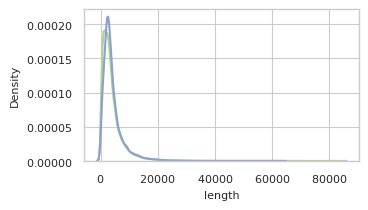

In [ ]:
# plot density of length on x and the amount of transcript on y
plt.figure(figsize=(((9)/2.54), (5/2.54)))
sns.kdeplot(data=transcriptome_length['length'], color='#AFD198', linewidth=1.5, label='Transcriptome')
sns.kdeplot(data=deg_length['length'], color='#8DA0CB', linewidth=1.5, label='DEGs')

/tmp/ipykernel_1102/376624301.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transcriptome_length['length_kb'] = np.array(transcriptome_length['length']) / 1000
/tmp/ipykernel_1102/376624301.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deg_length['length_kb'] = np.array(deg_length['length']) / 1000


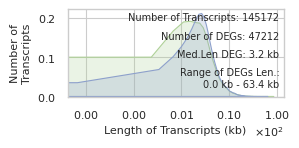

In [ ]:
# PLOT: Length Distribution of Genes 
sns.set_theme(style = 'whitegrid', palette='colorblind', context='paper', rc={'axes.labelsize':8, 'xtick.labelsize':8, 'ytick.labelsize':8, 'legend.fontsize':8, 'legend.title_fontsize':8, "axes.formatter.use_mathtext": True})
plt.figure(figsize=((8 / 2.54), (4 / 2.54)))

# Convert lengths to kilobases
transcriptome_length['length_kb'] = np.array(transcriptome_length['length']) / 1000
deg_length['length_kb'] = np.array(deg_length['length']) / 1000

# on the x axis: Length of genes (in kb)
plt.xlabel('Length of Transcripts (kb)')
# on the y axis: Number of genes
plt.ylabel('Number of\nTranscripts')



# Plot the density for both datasets
sns.kdeplot(transcriptome_length['length_kb'], fill=True, label='Transcript Length', color='#AFD198')
sns.kdeplot(deg_length['length_kb'], fill=True, label='DEG Length', color='#8DA0CB')
#'#FC8D62', '#AFD198', '#8DA0CB'
# set the x-axis on log scale
plt.xscale('log')

# change the x-axis to display less zeros
xfmt = plt.ScalarFormatter()
xfmt.set_powerlimits((0, 0))
plt.gca().xaxis.set_major_formatter(xfmt)

# LABELS: 
# add label for total number of genes 
plt.text(0.98, 0.96, f'Number of Transcripts: {len(transcriptome_length["transcript_id"])}',
          ha='right', va='top', transform=plt.gca().transAxes, fontsize=7)
# add total number of unique genes 
plt.text(0.98, 0.75, f"Number of DEGs: {len((deg_length['transcript_id']))}", 
         ha='right', va='top', transform=plt.gca().transAxes, fontsize=7)
# add numeric label for average at the top right corner 
plt.text(0.98, 0.54, f'Med.Len DEG: {deg_median / 1000:.1f} kb', ha='right', va='top', 
         transform=plt.gca().transAxes, fontsize=7)
plt.text(0.98, 0.33, f'Range of DEGs Len.:\n{deg_min /1000:.1f} kb - {deg_max / 1000:.1f} kb',
          ha='right', va='top', 
         transform=plt.gca().transAxes, fontsize=7)




plt.tight_layout()
# save the plot as svg 
plt.savefig('delncrnas_length_distribution.svg')

In [ ]:
len(deg_length['transcript_id'].unique())

47212

# 2 Calculate transcript length for lncRNA and DElncRNA 

In [ ]:

# Import lncRNA data
lncrna = pd.read_csv('../6_identify_common_lncRNA/common_lncrna_transcript_id.csv')
# calculate the length of the lncRNAs
lncrna_length = transcriptome_length[transcriptome_length['transcript_id'].str.strip().str.lower().isin(lncrna['transcript_id'].str.strip().str.lower())]

# filter the differentially expressed df only for delncRNAs
delncrna = deg.loc[deg['color'] == 'Differentially Expressed LncRNA']
# calculate the length of the delncRNAs
delncrna_length = transcriptome_length[transcriptome_length['transcript_id'].str.strip().str.lower().isin(delncrna['transcript_id'].str.strip().str.lower())]

In [ ]:
# calculate max/min/ average length of gene length
lncrna_length_max = lncrna_length['length'].max()
lncrna_length_min = lncrna_length['length'].min()
lncrna_length_mean = lncrna_length['length'].mean()

# calculate max length of gene length
delncrna_length_max = delncrna_length['length'].max()
delncrna_length_min = delncrna_length['length'].min()
delncrna_length_median = delncrna_length['length'].median()


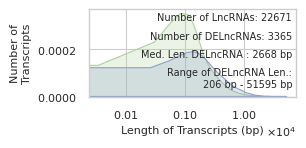

In [ ]:
# PLOT: Length Distribution of Genes 
sns.set_theme(style = 'whitegrid', palette='colorblind', context='paper', rc={'axes.labelsize':8, 'xtick.labelsize':8, 'ytick.labelsize':8, 'legend.fontsize':8, 'legend.title_fontsize':8, "axes.formatter.use_mathtext": True})
plt.figure(figsize=((8 / 2.54), (4 / 2.54)))


# on the x axis: Length of genes (in kb)
plt.xlabel('Length of Transcripts (bp)')
# on the y axis: Number of genes
plt.ylabel('Number of\nTranscripts')

# Plot the density for both datasets
sns.kdeplot(lncrna_length['length'], fill=True, label='lncRNA Length', color='#AFD198')
sns.kdeplot(delncrna_length['length'], fill=True, label='DELncRNA Length', color='#8DA0CB')
#'#FC8D62', '#AFD198', '#8DA0CB'
plt.xscale('log')

# change the x-axis to display less zeros
xfmt = plt.ScalarFormatter()
xfmt.set_powerlimits((0, 0))
plt.gca().xaxis.set_major_formatter(xfmt)

# change the y-axis to display less zeros
#yfmt = mticker.ScalarFormatter(useMathText=True)
#yfmt.set_powerlimits((0, 0))
#plt.gca().yaxis.set_major_formatter(yfmt)

# LABELS: 
# add label for total number of genes 
plt.text(0.98, 0.96, f'Number of LncRNAs: {len(lncrna_length["transcript_id"])}',
          ha='right', va='top', transform=plt.gca().transAxes, fontsize=7)
# add total number of unique genes 
plt.text(0.98, 0.75, f"Number of DELncRNAs: {len((delncrna_length['transcript_id']))}", 
         ha='right', va='top', transform=plt.gca().transAxes, fontsize=7)
# add Med. Len. = Median length 
plt.text(0.98, 0.54, f'Med. Len. DELncRNA : {delncrna_length_median:.0f} bp', ha='right', va='top', 
         transform=plt.gca().transAxes, fontsize=7)
plt.text(0.98, 0.33, f'Range of DELncRNA Len.:\n{delncrna_length_min} bp - {delncrna_length_max} bp',
          ha='right', va='top', 
         transform=plt.gca().transAxes, fontsize=7)

plt.tight_layout()
# save the plot as svg 
plt.savefig('delncrnas_length_distribution.svg')